### Load Functions

In [1]:
import pandas as pd

from simple_trade import download_data, compute_indicator
from simple_trade import CrossTradeBacktester
from simple_trade import BacktestPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Load Backtest Configuration

In [2]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
short_window = 25
long_window = 75
initial_cash = 10000.0
commission = 0.01
short_borrow_fee_inc_rate = 0.00001

### Load Data and Indicators

In [3]:
data = download_data(symbol, start_date, end_date, interval=interval)
data.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,72.716080,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.009094,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.582901,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.241539,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.403641,75.797501,76.110001,74.290001,74.290001,132079200


In [4]:
data = compute_indicator(data, indicator='sma', window=short_window)
data.tail(5)

Computing SMA...


Price,Adj Close,Close,High,Low,Open,Volume,SMA_25
Date,,,,,,,
2022-12-23,130.344498,131.860001,132.419998,129.639999,130.919998,63814900,142.4752
2022-12-27,128.535522,130.029999,131.410004,128.720001,131.380005,69007800,141.6248
2022-12-28,124.591393,126.040001,131.029999,125.870003,129.669998,85438400,140.7460
2022-12-29,128.120346,129.610001,130.479996,127.730003,127.989998,75703700,139.9232
2022-12-30,128.436646,129.929993,129.949997,127.430000,128.410004,77034200,139.0776


In [5]:
data = compute_indicator(data, indicator='sma', window=long_window)
data.tail(5)

Computing SMA...


Price,Adj Close,Close,High,Low,Open,Volume,SMA_25,SMA_75
Date,,,,,,,,
2022-12-23,130.344498,131.860001,132.419998,129.639999,130.919998,63814900,142.4752,145.628399
2022-12-27,128.535522,130.029999,131.410004,128.720001,131.380005,69007800,141.6248,145.263866
2022-12-28,124.591393,126.040001,131.029999,125.870003,129.669998,85438400,140.7460,144.765332
2022-12-29,128.120346,129.610001,130.479996,127.730003,127.989998,75703700,139.9232,144.442266
2022-12-30,128.436646,129.929993,129.949997,127.430000,128.410004,77034200,139.0776,144.103866


### Long Only Trading Backtest

In [6]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_75",
    price_col='Close',
)

In [7]:
pd.DataFrame(results, index=range(1))

,strategy,short_indicator_col,long_indicator_col,initial_cash,final_value,total_return_pct,num_trades,benchmark_strategy,benchmark_initial_cash,benchmark_shares,benchmark_buy_price,benchmark_final_price,benchmark_final_value,benchmark_return_pct,start_date,end_date,duration_days,days_in_backtest,years,annualized_return_pct,annualized_volatility_pct,sharpe_ratio,sortino_ratio,calmar_ratio,max_drawdown_pct,avg_drawdown_pct,max_drawdown_duration_days,avg_drawdown_duration_days,total_commissions
0,Cross Trade (SMA_25/SMA_75),SMA_25,SMA_75,10000.0,11400.77,14.01,16,Buy and Hold,10000.0,131.859363,75.087502,129.929993,17132.49,71.32,2020-04-20,2022-12-30,984,682,2.71,4.96,23.75,0.32,0.26,0.15,-33.59,-15.36,849,61.33,1936.74


In [8]:
backtester.print_results(results)


              ✨ Cross Trade (SMA_25/SMA_75) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $11,400.77
  • Total Return: 14.01%
  • Annualized Return: 4.96%
  • Number of Trades: 16
  • Total Commissions: $1,936.74

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -57.31%

📉 RISK METRICS:
  • Sharpe Ratio: 0.320
  • Sortino Ratio: 0.260
  • Maximum Drawdown: -33.59%
  • Average Drawdown: -15.36%
  • Max Drawdown Duration: 849 days
  • Avg Drawdown Duration: 61.33 days
  • Annualized Volatility: 23.75%



In [9]:
portfolio.tail(5)

,Price,PositionSize,PortfolioValue,Signal,Action,TradePrice,CommissionPaid,ShortFeePaid,daily_return,cum_max,drawdown,drawdown_start,drawdown_end
Date,,,,,,,,,,,,,
2022-12-23,131.860001,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False
2022-12-27,130.029999,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False
2022-12-28,126.040001,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False
2022-12-29,129.610001,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False
2022-12-30,129.929993,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False


In [10]:
portfolio.loc[portfolio["Signal"]!="Hold",:]

,Price,PositionSize,PortfolioValue,Signal,Action,TradePrice,CommissionPaid,ShortFeePaid,daily_return,cum_max,drawdown,drawdown_start,drawdown_end
Date,,,,,,,,,,,,,
2020-04-20,69.232498,0,10000.000000,NONE,HOLD,NaN,0.0,0.0,NaN,10000.00000,0.000000,False,True
2020-04-21,67.092499,0,10000.000000,NONE,HOLD,NaN,0.0,0.0,0.0,10000.00000,0.000000,False,False
2020-04-22,69.025002,0,10000.000000,NONE,HOLD,NaN,0.0,0.0,0.0,10000.00000,0.000000,False,False
2020-04-23,68.757500,0,10000.000000,NONE,HOLD,NaN,0.0,0.0,0.0,10000.00000,0.000000,False,False
2020-04-24,70.742500,0,10000.000000,NONE,HOLD,NaN,0.0,0.0,0.0,10000.00000,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False
2022-12-27,130.029999,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False
2022-12-28,126.040001,0,11400.768698,NONE,HOLD,NaN,0.0,0.0,0.0,16497.31246,-30.893176,False,False


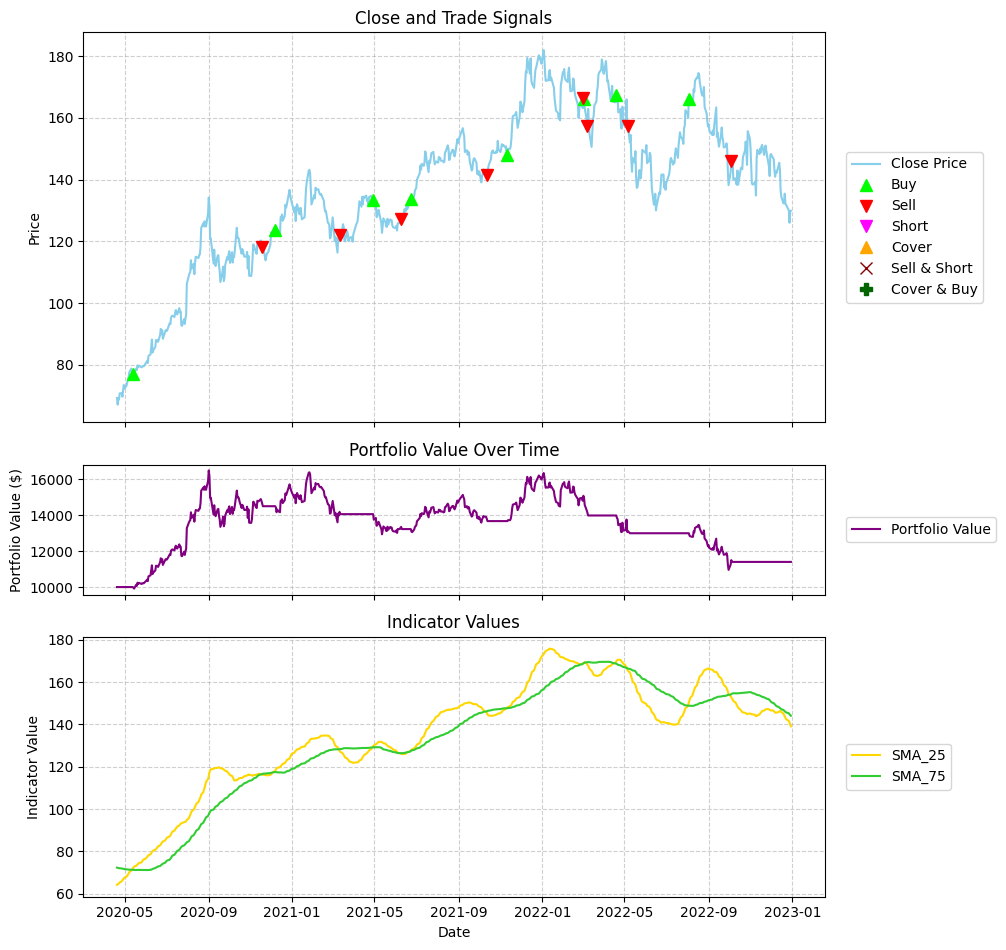

In [11]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Long Only) (SMA-{short_window} vs SMA-{long_window})"
)

### Short Only Trading Backtest

In [12]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission=commission, 
short_borrow_fee_inc_rate=short_borrow_fee_inc_rate)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_75",
    price_col='Close',
    trading_type = 'short'
)

In [13]:
portfolio.loc[portfolio["Signal"]!="Hold",:]

,Price,PositionSize,PortfolioValue,Signal,Action,TradePrice,CommissionPaid,ShortFeePaid,daily_return,cum_max,drawdown,drawdown_start,drawdown_end
Date,,,,,,,,,,,,,
2020-04-20,69.232498,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,NaN,10000.000000,0.000000,False,True
2020-04-21,67.092499,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.000000,0.000000,False,False
2020-04-22,69.025002,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.000000,0.000000,False,False
2020-04-23,68.757500,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.000000,0.000000,False,False
2020-04-24,70.742500,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.000000,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,-6,9610.402657,NONE,HOLD,NaN,0.0,0.007912,0.000230,10023.978724,-4.125867,False,False
2022-12-27,130.029999,-6,9621.374757,NONE,HOLD,NaN,0.0,0.007802,0.001142,10023.978724,-4.016409,False,False
2022-12-28,126.040001,-6,9645.306942,NONE,HOLD,NaN,0.0,0.007562,0.002487,10023.978724,-3.777659,False,False


In [14]:
backtester.print_results(results)


      ✨ Cross Trade (SMA_25/SMA_75) [Shorts Allowed] ✨      

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $9,614.15
  • Total Return: -3.78%
  • Annualized Return: -1.41%
  • Number of Trades: 15
  • Total Commissions: $139.70

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -75.10%

📉 RISK METRICS:
  • Sharpe Ratio: -0.800
  • Sortino Ratio: -0.740
  • Maximum Drawdown: -5.55%
  • Average Drawdown: -3.03%
  • Max Drawdown Duration: 766 days
  • Avg Drawdown Duration: 385.0 days
  • Annualized Volatility: 1.77%



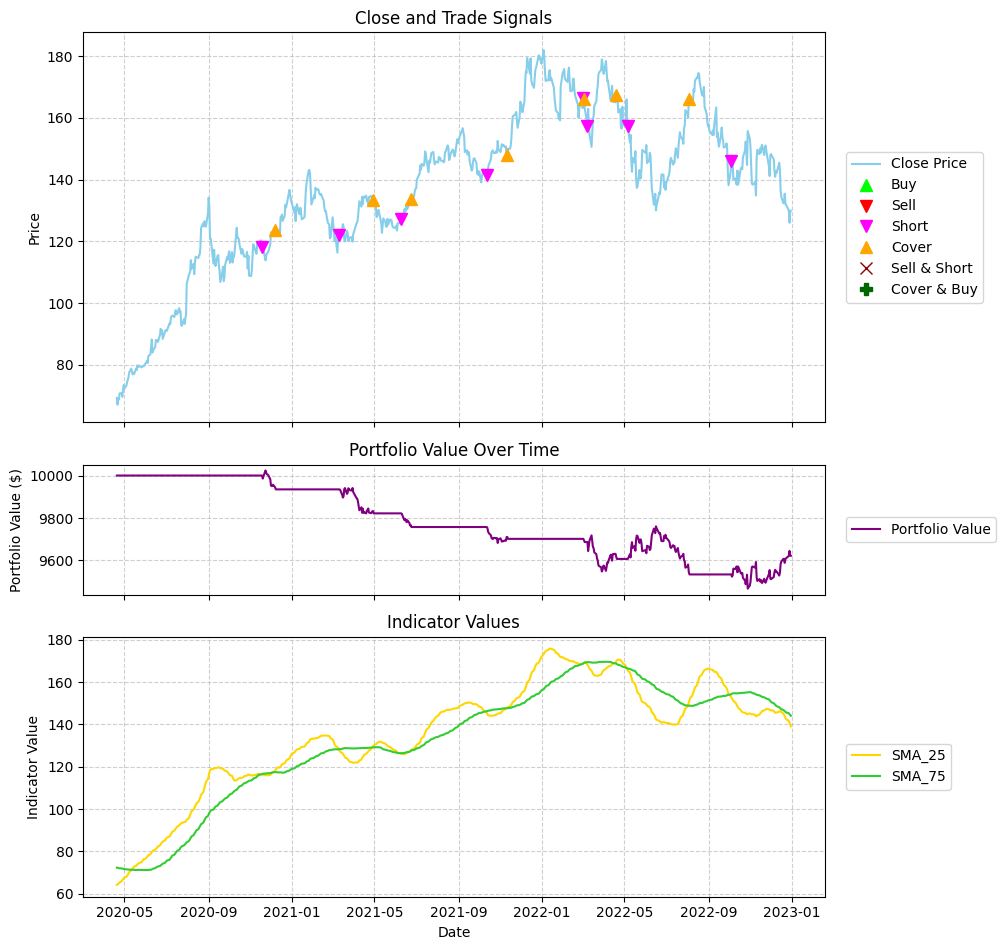

In [15]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Short Only) (SMA-{short_window} vs SMA-{long_window})"
)

### Mixed Trading Backtest (1st Scenario)

In [16]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission=commission, 
short_borrow_fee_inc_rate=short_borrow_fee_inc_rate)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_75",
    price_col='Close',
    trading_type = 'mixed'
)

In [17]:
backtester.print_results(results)


      ✨ Cross Trade (SMA_25/SMA_75) [Shorts Allowed] ✨      

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $10,947.19
  • Total Return: 9.56%
  • Annualized Return: 3.43%
  • Number of Trades: 31
  • Total Commissions: $2,079.89

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -61.76%

📉 RISK METRICS:
  • Sharpe Ratio: 0.260
  • Sortino Ratio: 0.190
  • Maximum Drawdown: -36.78%
  • Average Drawdown: -17.35%
  • Max Drawdown Duration: 849 days
  • Avg Drawdown Duration: 61.33 days
  • Annualized Volatility: 23.81%



In [18]:
portfolio.loc[portfolio["Signal"]!="Hold",:]

,Price,PositionSize,PortfolioValue,Signal,Action,TradePrice,CommissionPaid,ShortFeePaid,daily_return,cum_max,drawdown,drawdown_start,drawdown_end
Date,,,,,,,,,,,,,
2020-04-20,69.232498,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,NaN,10000.00000,0.000000,False,True
2020-04-21,67.092499,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.00000,0.000000,False,False
2020-04-22,69.025002,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.00000,0.000000,False,False
2020-04-23,68.757500,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.00000,0.000000,False,False
2020-04-24,70.742500,0,10000.000000,NONE,HOLD,NaN,0.0,0.000000,0.000000,10000.00000,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,-7,10942.819542,NONE,HOLD,NaN,0.0,0.009230,0.000236,16497.31246,-33.669078,False,False
2022-12-27,130.029999,-7,10955.620325,NONE,HOLD,NaN,0.0,0.009102,0.001170,16497.31246,-33.591484,False,False
2022-12-28,126.040001,-7,10983.541208,NONE,HOLD,NaN,0.0,0.008823,0.002549,16497.31246,-33.422239,False,False


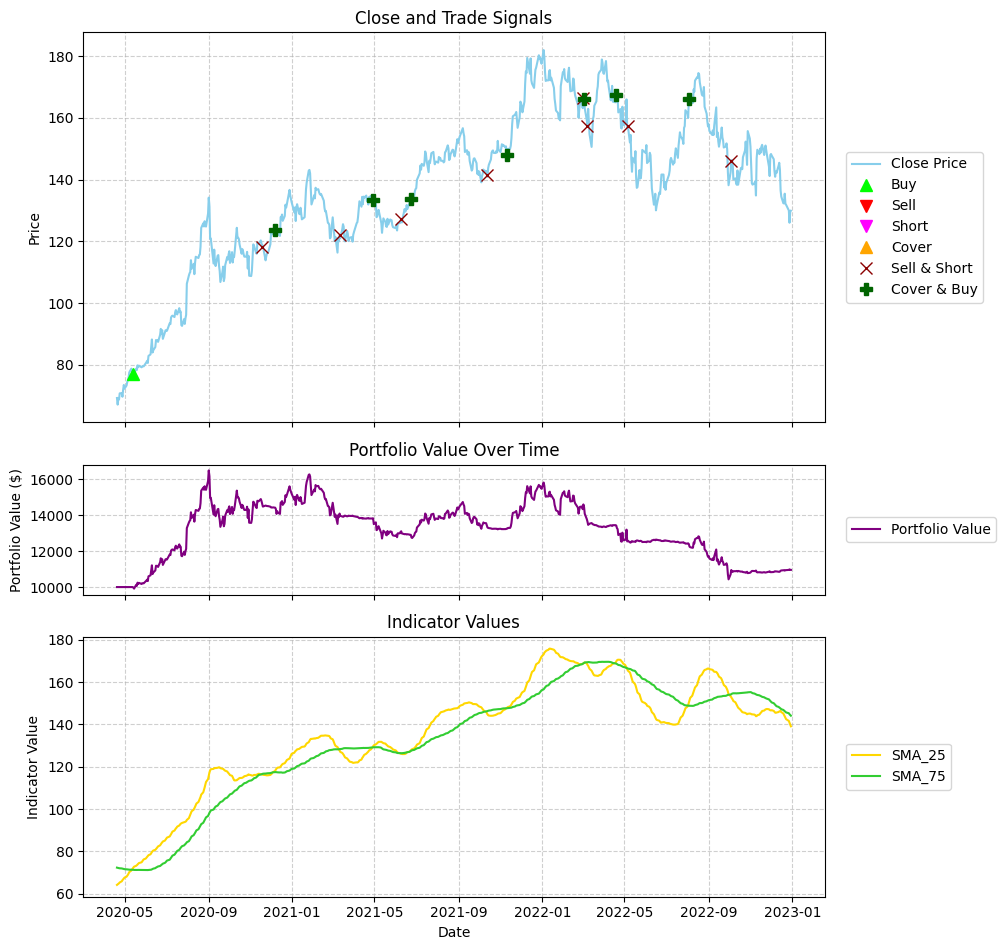

In [19]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Mixed Trading) (SMA-{short_window} vs SMA-{long_window})"
)

### Mixed Trading Backtest (2nd Scenario)

In [20]:
short_window = 25
long_window = 150

data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data, indicator='sma', window=short_window)
data = compute_indicator(data, indicator='sma', window=long_window)

Computing SMA...
Computing SMA...


In [21]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission=commission, 
short_borrow_fee_inc_rate=short_borrow_fee_inc_rate)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_150",
    price_col='Close',
    trading_type = 'mixed'
)

backtester.print_results(results)


     ✨ Cross Trade (SMA_25/SMA_150) [Shorts Allowed] ✨      

🗓️ BACKTEST PERIOD:
  • Period: 2020-08-05 to 2022-12-30
  • Duration: 877 days
  • Trading Days: 607

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $7,776.78
  • Total Return: -22.17%
  • Annualized Return: -9.88%
  • Number of Trades: 13
  • Total Commissions: $557.55

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -93.49%

📉 RISK METRICS:
  • Sharpe Ratio: -0.510
  • Sortino Ratio: -0.620
  • Maximum Drawdown: -36.44%
  • Average Drawdown: -13.68%
  • Max Drawdown Duration: 360 days
  • Avg Drawdown Duration: 51.17 days
  • Annualized Volatility: 17.46%



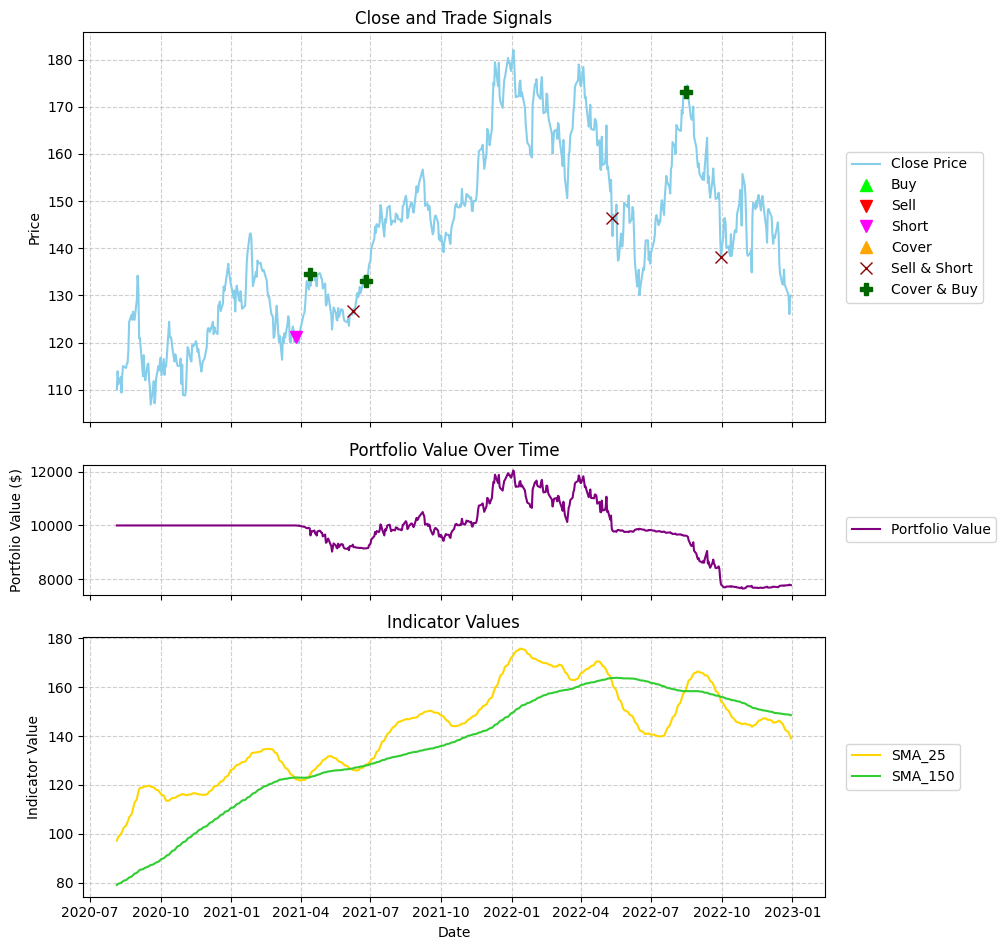

In [22]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Mixed Trading) (SMA-{short_window} vs SMA-{long_window})"
)